## Business case:- Buisness case: Target is to classify image data into three types of riceleaf diseases.bacterial leaf blight, brown spot and leaf smut.

In the Philippines, rice farming industry is very dominant encompassing over 10 million Filipinos. However, these 
families earn as low as 10 pesos due to the current economy in the industry. Add this to the fact that 37\% of their production 
are lost due to pests and diseases.

This study aims to help farmers by early detection of disease through rice leaf image processing using convolutional neural 
networks. they are over all 119 Rice leaf images.
Over 3 categories: Leaf Blast, Brown Spot
    we will find out the which leaf disease is better to use
This consists of 119 images of isolated rice leaves with four classifications: or afflicted with one of the 
diseases:  Bacterial Leaf(40), Brown Spot (40), or Leaf smut (39). 
    1.the Bacterial Leaf image sizes are width 3081pixels and height 897pixels
    2.the Brown Spot image sizes width 766pixels and height 250pixels
    3.the Brown Spot image sizes width 3081pixels and height 897pixels

In [1]:
# Convolutional Neural Network
## importing libraries
import tensorflow 
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Importing Deep Learning Libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator ## read the data from folders.

In [3]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array # for converting image to arrays

In [4]:
from tensorflow.keras import backend as k


In [5]:
#The dimension of the images we are going to define is 150x150 
img_width, img_height = 150, 150

In [6]:
#Define some often used standard parameters
#The batch refers to the number of training examples utilized in one #iteration
epochs = 100
batch_size = 6

In [22]:
dir = r"/content/drive/MyDrive/dev"


In [24]:
import os
from glob import glob

In [25]:
Bacterial_leaf_blight = glob(os.path.join(dir+"/Bacterial leaf blight/"+"*"))
Brown_spot = glob(os.path.join(dir+"/Brown spot/"+"*"))
Leaf_smut = glob(os.path.join(dir+"/Leaf smut/"+"*"))
print("Bacterial_leaf_blight\n",len(Bacterial_leaf_blight))
print("Brown_spot\n",len(Brown_spot))
print("Leaf_smut \n",len(Leaf_smut))

Bacterial_leaf_blight
 40
Brown_spot
 40
Leaf_smut 
 39


In [26]:
bleaf = Bacterial_leaf_blight[:2]
browns = Brown_spot[:2]
leafs = Leaf_smut[:2]

In [28]:
from matplotlib.pyplot import imshow
import PIL.Image as Image


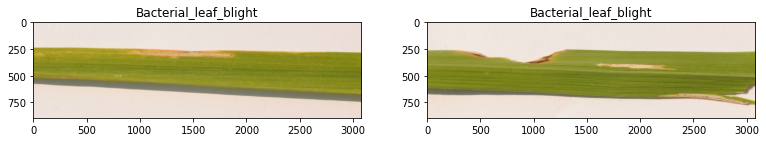

In [29]:
plt.figure(figsize=(20,35))
for i,k  in enumerate(bleaf):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Bacterial_leaf_blight")

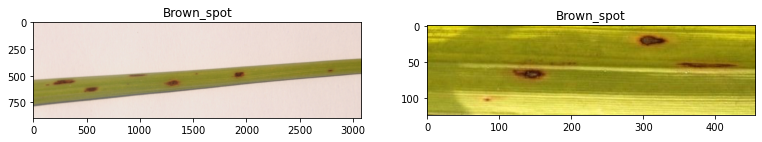

In [30]:
plt.figure(figsize=(20,35))
for i,k  in enumerate(browns):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Brown_spot")

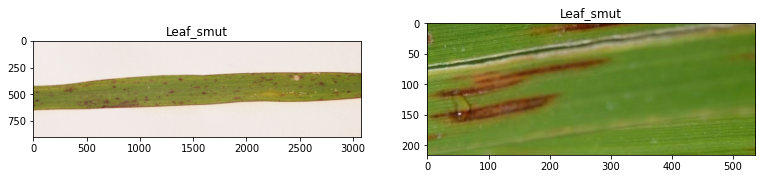

In [31]:
plt.figure(figsize=(20,35))
for i,k  in enumerate(leafs):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Leaf_smut")

In [7]:
# creating a variable where data is present
# and i will make it as roston "r"
train_path= r"/content/drive/MyDrive/dev/train"
valid_path = r"/content/drive/MyDrive/dev/validation"

In [8]:
if k.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [9]:
from  tensorflow.keras.models import Sequential

In [10]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [11]:
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

In [12]:
model1 = Sequential()# creating an object for the "Sequential" class
#  1 st CONVOLUTION & MAXPOOLING
model1.add(Conv2D(32, (3, 3), input_shape=input_shape)) 
model1.add(Activation('relu'))# adding the 1st convolutional hidden layer layer with {32=filters, (3,3)=matrix, activation_function= 'relu'}
model1.add(MaxPooling2D(pool_size=(2, 2)))# after convolution 'MaxPooling2D' is done with {matrix=(2,2)}

# 2nd CONVOLUTION & MAXPOOLING
model1.add(Conv2D(32, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

# after maxpooling 'Flatten' the 2D images
model1.add(Flatten())
model1.add(Dense(64))# shape of 1 image is {(150,150,3) = X.shape[1:]}
# after flatten , now we have pass through the Neural Network ('Dense') with {(128=neurons in hidden layer),
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(3))

# output layer
model1.add(Activation('softmax'))
# in output layer usually we prediction (0 to 1) so we 'sigmoid', 'softmax' activation function

In [ ]:
# now our model is ready

In [13]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop


In [ ]:
# now we add 'loss function'  and 'optimizer'
# these are nothing but in back propagation what values should the weights, bias we updated

In [14]:
# Compiling the CNN
model1.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
# we used 'adam' optimizer which is go to optimer for most of the used cases
# than we will pass into the loss function'categorical_crossentropy' since we have 3 neurons in the output layer
# we also need to track the metrics of accuracy


In [15]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)



In [16]:
# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_frotrain_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    valid_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 86 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [17]:
# now fit the model to our data set
history1 =model1.fit(
    train_generator,
    steps_per_epoch=86 // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=24// batch_size)
# "epochs"  front & back ward motion in front & back propagation

Epoch 1/100
14/14 [==============================] - 62s 4s/step - loss: 1.2395 - accuracy: 0.3750 - val_loss: 1.1036 - val_accuracy: 0.3333
Epoch 2/100
14/14 [==============================] - 6s 412ms/step - loss: 1.1130 - accuracy: 0.3250 - val_loss: 1.0964 - val_accuracy: 0.3333
Epoch 3/100
14/14 [==============================] - 6s 408ms/step - loss: 1.0961 - accuracy: 0.3000 - val_loss: 1.0907 - val_accuracy: 0.7083
Epoch 4/100
14/14 [==============================] - 6s 420ms/step - loss: 1.1054 - accuracy: 0.4405 - val_loss: 1.0643 - val_accuracy: 0.6667
Epoch 5/100
14/14 [==============================] - 6s 430ms/step - loss: 1.0878 - accuracy: 0.3625 - val_loss: 1.0520 - val_accuracy: 0.3333
Epoch 6/100
14/14 [==============================] - 6s 410ms/step - loss: 1.0927 - accuracy: 0.4125 - val_loss: 1.0139 - val_accuracy: 0.6667
Epoch 7/100
14/14 [==============================] - 6s 410ms/step - loss: 0.9872 - accuracy: 0.4875 - val_loss: 0.9466 - val_accuracy: 0.6667
E

In [18]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline 


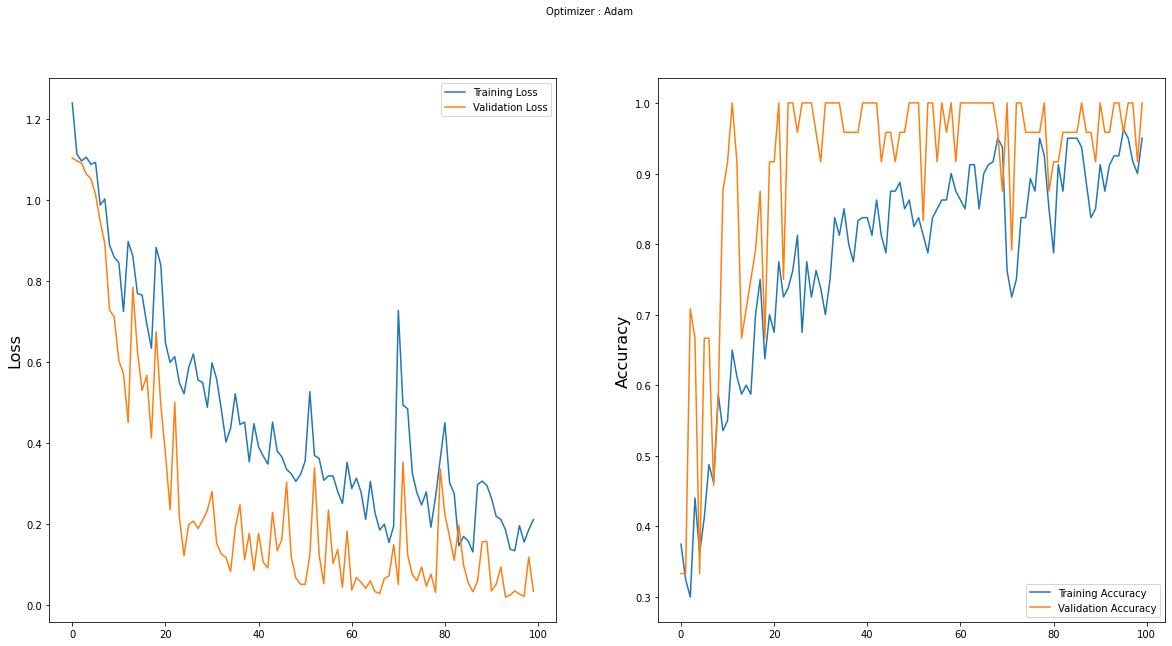

In [21]:
#plotting training and validation Loss
#plotting training and validation Accuracy 

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## Prediction
​

## bacterial

'Bacterial leaf blight'

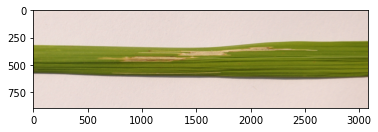

In [33]:
import numpy as np
from tensorflow.keras.preprocessing import image
path = r'/content/drive/MyDrive/dev/Bacterial leaf blight/DSC_0383.JPG'
test_image = image.load_img(path)
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.imshow(test_image)
test_img = image.load_img(path, target_size=input_shape)
test_img = image.img_to_array(test_img)
test_img = test_img/255
test_img = np.expand_dims(test_img,axis=0)
result = model1.predict(test_img)

a = result.argmax()
s = train_generator.class_indices
name = [ ]
for i in s:
     name.append(i)
for i in range(len(s)):
     if (i==a):
          p=name[i]
p


## leaf smut

'Leaf smut'

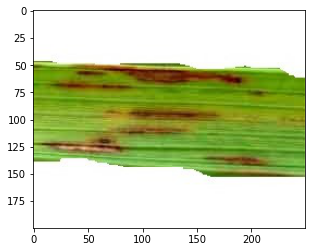

In [38]:
import numpy as np
from tensorflow.keras.preprocessing import image
path = r'/content/drive/MyDrive/dev/Leaf smut/DSC_0504.jpg'
test_image = image.load_img(path)
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.imshow(test_image)
test_img = image.load_img(path, target_size=input_shape)
test_img = image.img_to_array(test_img)
test_img = test_img/255
test_img = np.expand_dims(test_img,axis=0)
result = model1.predict(test_img)
a = result.argmax()
s = train_generator.class_indices
name = [ ]
for i in s:
     name.append(i)
for i in range(len(s)):
     if (i==a):
       p=name[i]
p

## brown spot

'Brown spot'

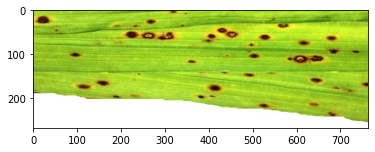

In [39]:
import numpy as np
from tensorflow.keras.preprocessing import image
path = r'/content/drive/MyDrive/dev/Brown spot/DSC_0108.jpg'
test_image = image.load_img(path)
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.imshow(test_image)
test_img = image.load_img(path, target_size=input_shape)
test_img = image.img_to_array(test_img)
test_img = test_img/255
test_img = np.expand_dims(test_img,axis=0)
result = model1.predict(test_img)
a = result.argmax()
s = train_generator.class_indices
name = [ ]
for i in s:
     name.append(i)
for i in range(len(s)):
     if (i==a):
       p=name[i]
p

## Conclusion

In [ ]:
Three different classifications of rice leaf diseases were studied and compared with the healthy rice leaf using the convolutional neural 
network. Using 119 images as training data and different image pre-processing techniques, we were able to identify what type of disease. 
Diving deeper, we can accurately classify a healthy leaf as healthy which would aid the farmers save resources by not treating the already 
healthy plants.